In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Movie Review Dataset.csv')

# Display the first few rows to verify the data
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Select only the 'review' and 'sentiment' features
X = data['review']
y = data['sentiment']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can use a simple vectorizer or TF-IDF to transform the review text into a numerical format
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Use the top 5000 words in the reviews
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Normalize the data using StandardScaler (important for some algorithms like KNN)
scaler = StandardScaler(with_mean=False)  # with_mean=False because of sparse matrix
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)


In [6]:
# Initialize the models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

# Dictionary to store models
models = {
    'Random Forest': rf,
    'K-Nearest Neighbors': knn,
    'AdaBoost': ada,
    'Logistic Regression': lr,
    'Decision Tree': dt
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions on the test set
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Store results for comparison
    model_performance[name] = accuracy


--- Random Forest ---
Accuracy: 0.853
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      4961
    positive       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

--- K-Nearest Neighbors ---
Accuracy: 0.6088
              precision    recall  f1-score   support

    negative       0.66      0.43      0.52      4961
    positive       0.58      0.78      0.67      5039

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.60     10000
weighted avg       0.62      0.61      0.60     10000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- AdaBoost ---
Accuracy: 0.8078
              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      4961
    positive       0.79      0.84      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

--- Logistic Regression ---
Accuracy: 0.8684
              precision    recall  f1-score   support

    negative       0.87      0.86      0.87      4961
    positive       0.87      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

--- Decision Tree ---
Accuracy: 0.7088
              precision    recall  f1-score   support

    negative       0.71      0.71      0.71      4961
    positive       0.71      0.71      0.71      5039

    accuracy                           0.71     10000
   macro a

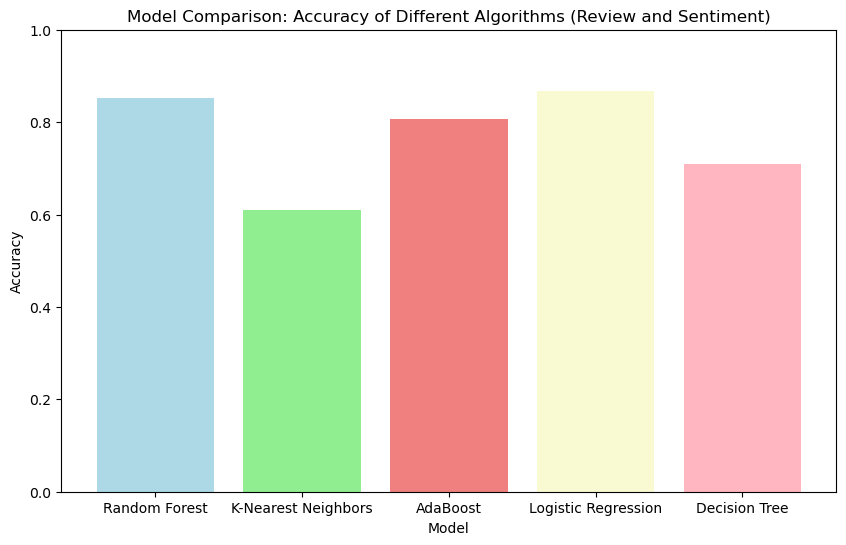

In [7]:
# Plot the accuracy of each model for comparison
model_names = list(model_performance.keys())
accuracy_values = list(model_performance.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightpink'])
plt.title('Model Comparison: Accuracy of Different Algorithms (Review and Sentiment)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


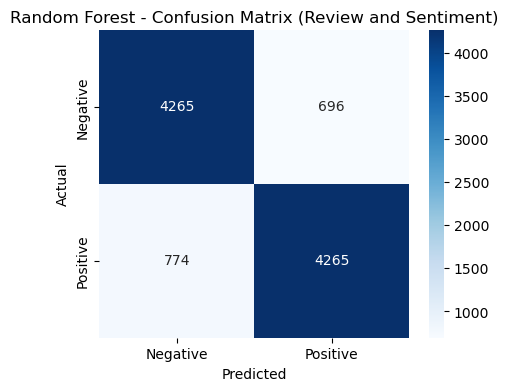

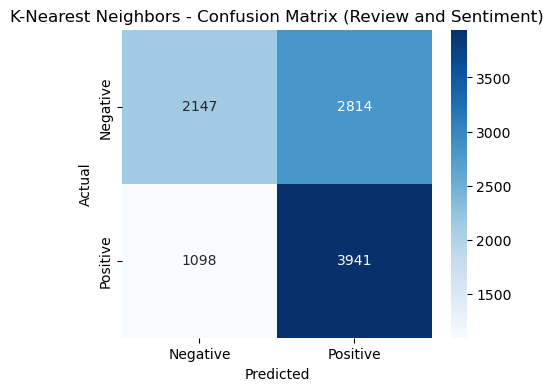

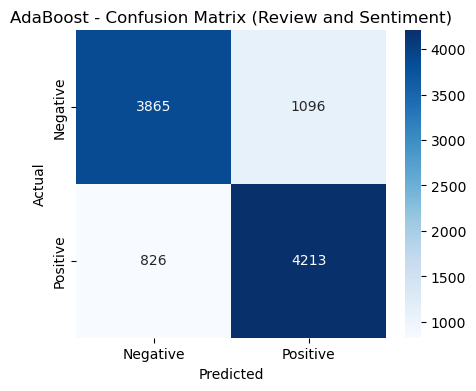

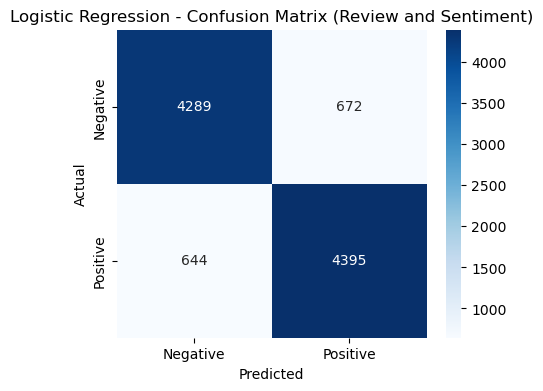

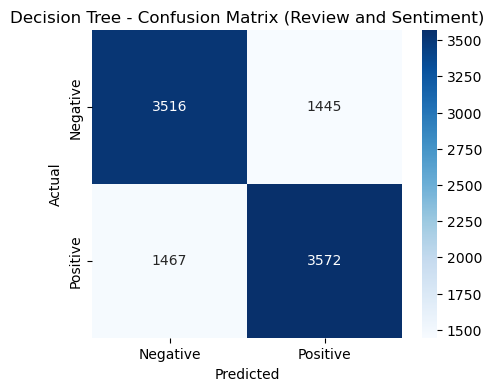

In [8]:
# Visualize the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{name} - Confusion Matrix (Review and Sentiment)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
